In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import tarfile
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kakshak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
tarfname = "data/sentiment.tar.gz"

In [3]:
tar = tarfile.open(tarfname, "r:gz")
trainname = "train.tsv"
devname = "dev.tsv"
unlabel="unlabeled.tsv"
for member in tar.getmembers():
    if 'train.tsv' in member.name:
        trainname = member.name
    elif 'dev.tsv' in member.name:
        devname = member.name
    else:
        unlabel=member.name
        

In [4]:
member = tar.getmember(trainname)
tf = tar.extractfile(member)
data = []
labels = []
for line in tf:
    line = line.decode("utf-8")
    (label,text) = line.strip().split("\t")
    labels.append(label)
    data.append(text)
train_data,train_labels=data, labels

In [5]:
member = tar.getmember(devname)
tf = tar.extractfile(member)
data = []
labels = []
for line in tf:
    line = line.decode("utf-8")
    (label,text) = line.strip().split("\t")
    labels.append(label)
    data.append(text)
dev_data,dev_labels=data, labels

In [6]:
member = tar.getmember(unlabel)
tf = tar.extractfile(member)
data = []
for line in tf:
    line = line.decode("utf-8")
    data.append(line)
unlabel_data=data

In [7]:
le = preprocessing.LabelEncoder()
le.fit(train_labels)
target_labels = le.classes_
trainy = le.transform(train_labels)
devy = le.transform(dev_labels)

In [8]:
tar.close()

In [9]:
def evaluate(X, yt, cls, name='data'):
    """Evaluated a classifier on the given labeled data using accuracy."""
    yp = cls.predict(X)
    acc = metrics.accuracy_score(yt, yp)
    print("  Accuracy on %s  is: %s" % (name, acc))
    return(acc)

In [10]:
accuracy_train_data=[]
accuracy_dev_data=[]

# Base: Count Vectorizer with white space tokenizer

In [11]:
count_vect = CountVectorizer()
trainX = count_vect.fit_transform(train_data)
devX = count_vect.transform(dev_data)

In [12]:
cls = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)
cls.fit(trainX, trainy)
accuracy_train_data.append(evaluate(trainX, trainy, cls, 'train'))
accuracy_dev_data.append(evaluate(devX, devy, cls, 'dev'))

  Accuracy on train  is: 0.9821038847664775
  Accuracy on dev  is: 0.777292576419214


# Independent Feature Engineering

# Method 1: Count Vectorizer with Stop Words Removal tokenizer

In [13]:
def remove_stop_words(sentence):
    sentence=sentence.lower()
    text_tokens = word_tokenize(sentence)
    tokens_without_sw = [word for word in text_tokens if not word in set(stopwords.words("english"))]
    return(tokens_without_sw)

In [14]:
count_vect = CountVectorizer(tokenizer=remove_stop_words)
trainX = count_vect.fit_transform(train_data)
devX = count_vect.transform(dev_data)

In [15]:
cls = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)
cls.fit(trainX, trainy)
accuracy_train_data.append(evaluate(trainX, trainy, cls, 'train'))
accuracy_dev_data.append(evaluate(devX, devy, cls, 'dev'))

  Accuracy on train  is: 0.9827586206896551
  Accuracy on dev  is: 0.7663755458515283


#  Method 2: Count Vectorizer with Stemming tokenizer

In [16]:
porter_stemmer = PorterStemmer()

In [17]:
def stemming(sentence):
    sentence=sentence.lower()
    tokens = nltk.word_tokenize(sentence)
    t=[]
    for w in tokens:
        t.append(porter_stemmer.stem(w))
    return(t)

In [18]:
count_vect = CountVectorizer(tokenizer=stemming)
trainX = count_vect.fit_transform(train_data)
devX = count_vect.transform(dev_data)

In [19]:
cls = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)
cls.fit(trainX, trainy)
accuracy_train_data.append(evaluate(trainX, trainy, cls, 'train'))
accuracy_dev_data.append(evaluate(devX, devy, cls, 'dev'))

  Accuracy on train  is: 0.9751200349192493
  Accuracy on dev  is: 0.7707423580786026


#  Method 3: Count Vectorizer with Lammentization tokenizer


In [20]:
lemmatizer = WordNetLemmatizer()

In [21]:
def lammentization(sentence):
    sentence=sentence.lower()
    arli=[]
    for i in sentence.split(" "):
        arli.append(lemmatizer.lemmatize(i))
    return(arli)

In [22]:
count_vect = CountVectorizer(tokenizer=lammentization)
trainX = count_vect.fit_transform(train_data)
devX = count_vect.transform(dev_data)

In [23]:
cls = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000)
cls.fit(trainX, trainy)
accuracy_train_data.append(evaluate(trainX, trainy, cls, 'train'))
accuracy_dev_data.append(evaluate(devX, devy, cls, 'dev'))

  Accuracy on train  is: 0.9934526407682235
  Accuracy on dev  is: 0.7707423580786026


## Tables for Accuracies of Different Feature Engineering Techniques

In [24]:
df = pd.DataFrame(accuracy_train_data,     index=["Base Model","Stop Words Remmoval","Stemming","Lammentization"],
                 columns=["Accuracies on Train Data"])
df

,Accuracies on Train Data
Base Model,0.982104
Stop Words Remmoval,0.982759
Stemming,0.975120
Lammentization,0.993453


In [25]:
df.to_csv(r'result-2-2_method_comparision_train.csv', header=True)

In [26]:
df = pd.DataFrame(accuracy_dev_data,     index=["Base Model","Stop Words Remmoval","Stemming","Lammentization"],
                 columns=["Accuracies on Dev Data"])
df

,Accuracies on Dev Data
Base Model,0.777293
Stop Words Remmoval,0.766376
Stemming,0.770742
Lammentization,0.770742


In [27]:
df.to_csv(r'result-2-2_method_comparision_dev.csv', header=True)

## Graph Analysis

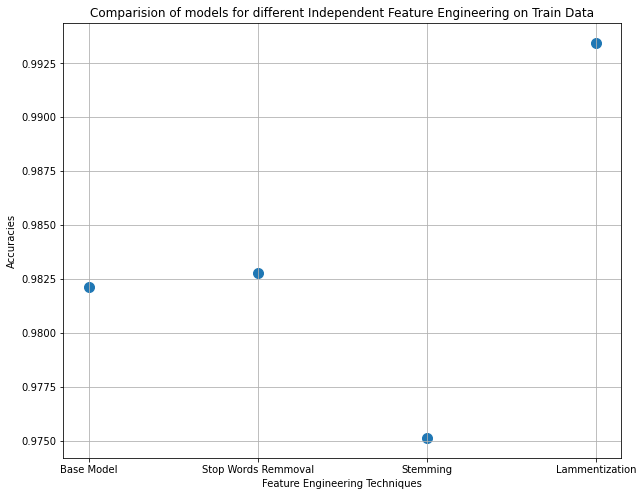

In [28]:
fig=plt.figure(figsize=(10,8))
x=["Base Model","Stop Words Remmoval","Stemming","Lammentization"]
plt.scatter(x,accuracy_train_data,s=100)
plt.xlabel("Feature Engineering Techniques")
plt.ylabel("Accuracies")
plt.title("Comparision of models for different Independent Feature Engineering on Train Data")
plt.grid()
plt.show()

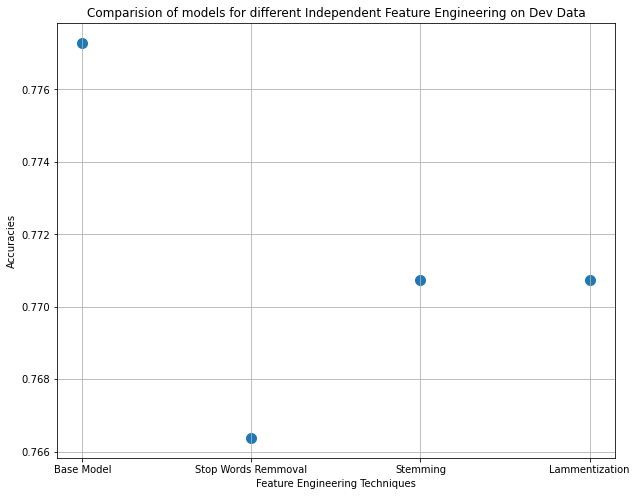

In [29]:
fig=plt.figure(figsize=(10,8))
x=["Base Model","Stop Words Remmoval","Stemming","Lammentization"]
plt.scatter(x,accuracy_dev_data,s=100)
plt.xlabel("Feature Engineering Techniques")
plt.ylabel("Accuracies")
plt.title("Comparision of models for different Independent Feature Engineering on Dev Data")
plt.grid()
plt.show()

# Method 4: TF-IDF on Independent Feature Engineering Method 1 Stop Word Removal

In [30]:
# Remove Stop Words

def remove_stop_words(sentence):
    sentence=sentence.lower()
    text_tokens = word_tokenize(sentence)
    tokens_without_sw = [word for word in text_tokens if not word in set(stopwords.words("english"))]
    return(tokens_without_sw)

In [31]:
def evaluate1(X, yt, cls, name='data'):
    """Evaluated a classifier on the given labeled data using accuracy."""
    yp = cls.predict(X)
    acc = metrics.accuracy_score(yt, yp)
    #print("  Accuracy on %s  is: %s" % (name, acc))
    return(acc)

In [32]:
regularizer=[0.01,0.1,1,10,100]
ngram=7
accuraciest1=[]
accuraciesd1=[]
for j in regularizer:
    valuest=[]
    valuesd=[]
    for i in range(1,ngram):
        vectorizer = TfidfVectorizer(tokenizer=remove_stop_words, ngram_range=(1, i))
#         print(f"The value of ngram={i},value of regularizer={j}")
        XTrain = vectorizer.fit_transform(train_data)
        devTrain=vectorizer.transform(dev_data)
        tfidf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000,C=j)
        tfidf.fit(XTrain, trainy)
        valuest.append(round(evaluate1(XTrain, trainy, tfidf, 'train'),8))
        valuesd.append(round(evaluate1(devTrain, devy, tfidf, 'dev'),8))
    accuraciest1.append(valuest)
    accuraciesd1.append(valuesd)

In [33]:
accuraciestpd = np.array(accuraciest1)
print("Accuracies on Train")
df = pd.DataFrame(accuraciest1,     index=["C=0.01","C=0.1","C=1","C=10","C=100"],
                 columns=['1-gram', '2-gram','3-gram','4-gram','5-gram','6-gram'])
# for i in range(len(accuraciest)):
#     print("C=",regularizer[i],end="\t\t")
#     for j in range(len(accuraciest[0])):
#         print(j,"-gram",accuraciest[i][j],end=" ")
#     print()
df

Accuracies on Train


,1-gram,2-gram,3-gram,4-gram,5-gram,6-gram
C=0.01,0.764732,0.828896,0.882802,0.924924,0.948931,0.963335
C=0.1,0.808599,0.865343,0.907900,0.939110,0.961371,0.973592
C=1,0.903754,0.961152,0.983632,0.992143,0.996508,0.998472
C=10,0.988651,1.000000,1.000000,1.000000,1.000000,1.000000
C=100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
accuracy_train_data.append(max(df.max()))
df.to_csv(r'result-2-2_TF-IDF+stop_train.csv',header=True)

In [35]:
accuraciesdpd = np.array(accuraciesd1)
print("Accuracies on Dev")
df = pd.DataFrame(accuraciesd1,     index=["C=0.01","C=0.1","C=1","C=10","C=100"],
                 columns=['1-gram', '2-gram','3-gram','4-gram','5-gram','6-gram'])
# for i in range(len(accuraciest)):
#     print("C=",regularizer[i],end="\t\t")
#     for j in range(len(accuraciest[0])):
#         print(j,"-gram",accuraciest[i][j],end=" ")
#     print()
df

Accuracies on Dev


,1-gram,2-gram,3-gram,4-gram,5-gram,6-gram
C=0.01,0.709607,0.720524,0.729258,0.729258,0.731441,0.729258
C=0.1,0.727074,0.735808,0.735808,0.740175,0.737991,0.737991
C=1,0.772926,0.764192,0.759825,0.753275,0.753275,0.751092
C=10,0.783843,0.779476,0.783843,0.777293,0.775109,0.777293
C=100,0.781659,0.766376,0.781659,0.779476,0.775109,0.777293


In [36]:
accuracy_dev_data.append(max(df.max()))
df.to_csv(r'result-2-2_TF-IDF+stop_dev.csv', header=True)

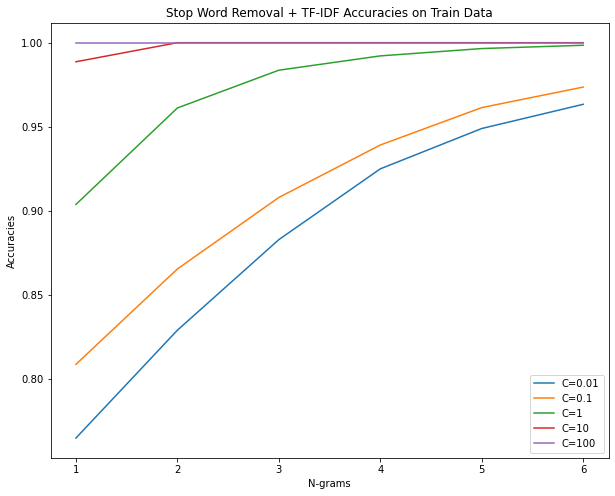

In [37]:
fig=plt.figure(figsize=(10,8))
x=[1,2,3,4,5,6]
plt.plot(x,accuraciest1[0],label="C=0.01")
plt.plot(x,accuraciest1[1],label="C=0.1")
plt.plot(x,accuraciest1[2],label="C=1")
plt.plot(x,accuraciest1[3],label="C=10")
plt.plot(x,accuraciest1[4],label="C=100")
plt.xlabel("N-grams")
plt.ylabel("Accuracies")
plt.title("Stop Word Removal + TF-IDF Accuracies on Train Data")
plt.legend()
plt.show()

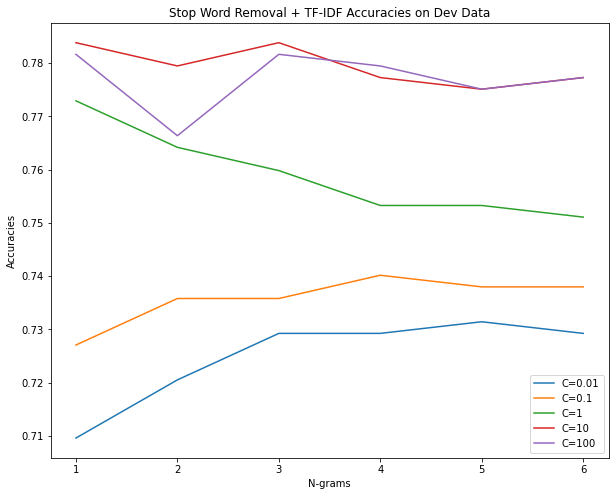

In [38]:
fig=plt.figure(figsize=(10,8))
x=[1,2,3,4,5,6]
plt.plot(x,accuraciesd1[0],label="C=0.01")
plt.plot(x,accuraciesd1[1],label="C=0.1")
plt.plot(x,accuraciesd1[2],label="C=1")
plt.plot(x,accuraciesd1[3],label="C=10")
plt.plot(x,accuraciesd1[4],label="C=100")
plt.xlabel("N-grams")
plt.ylabel("Accuracies")
plt.title("Stop Word Removal + TF-IDF Accuracies on Dev Data")
plt.legend()
plt.show()

# Method 5: TF-IDF on Independent Feature Engineering Method 2 Stemming

In [39]:
porter_stemmer = PorterStemmer()

In [40]:
def stemming(sentence):
    sentence=sentence.lower()
    tokens = nltk.word_tokenize(sentence)
    t=[]
    for w in tokens:
        t.append(porter_stemmer.stem(w))
    return(t)

In [41]:
regularizer=[0.01,0.1,1,10,100]
ngram=7
accuraciest1=[]
accuraciesd1=[]
for j in regularizer:
    valuest=[]
    valuesd=[]
    for i in range(1,ngram):
        vectorizer = TfidfVectorizer(tokenizer=stemming, ngram_range=(1, i))
#         print(f"The value of ngram={i},value of regularizer={j}")
        XTrain = vectorizer.fit_transform(train_data)
        devTrain=vectorizer.transform(dev_data)
        tfidf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000,C=j)
        tfidf.fit(XTrain, trainy)
        valuest.append(round(evaluate1(XTrain, trainy, tfidf, 'train'),8))
        valuesd.append(round(evaluate1(devTrain, devy, tfidf, 'dev'),8))
    accuraciest1.append(valuest)
    accuraciesd1.append(valuesd)

In [42]:
accuraciestpd = np.array(accuraciest1)
print("Accuracies on Train")
df = pd.DataFrame(accuraciest1,     index=["C=0.01","C=0.1","C=1","C=10","C=100"],
                 columns=['1-gram', '2-gram','3-gram','4-gram','5-gram','6-gram'])
# for i in range(len(accuraciest)):
#     print("C=",regularizer[i],end="\t\t")
#     for j in range(len(accuraciest[0])):
#         print(j,"-gram",accuraciest[i][j],end=" ")
#     print()
df

Accuracies on Train


,1-gram,2-gram,3-gram,4-gram,5-gram,6-gram
C=0.01,0.774771,0.828023,0.877564,0.918376,0.944347,0.963335
C=0.1,0.804670,0.854212,0.897425,0.934090,0.956351,0.972719
C=1,0.888258,0.950240,0.974684,0.987560,0.994544,0.997599
C=10,0.976866,1.000000,1.000000,1.000000,1.000000,1.000000
C=100,0.999782,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
accuracy_train_data.append(max(df.max()))
df.to_csv(r'result-2-2_TF-IDF+stem_train.csv', header=True)

In [44]:
accuraciesdpd = np.array(accuraciesd1)
print("Accuracies on Dev")
df = pd.DataFrame(accuraciesd1,     index=["C=0.01","C=0.1","C=1","C=10","C=100"],
                 columns=['1-gram', '2-gram','3-gram','4-gram','5-gram','6-gram'])
# for i in range(len(accuraciest)):
#     print("C=",regularizer[i],end="\t\t")
#     for j in range(len(accuraciest[0])):
#         print(j,"-gram",accuraciest[i][j],end=" ")
#     print()
df

Accuracies on Dev


,1-gram,2-gram,3-gram,4-gram,5-gram,6-gram
C=0.01,0.716157,0.731441,0.737991,0.746725,0.744541,0.744541
C=0.1,0.735808,0.740175,0.748908,0.748908,0.748908,0.744541
C=1,0.766376,0.775109,0.777293,0.775109,0.770742,0.766376
C=10,0.779476,0.794760,0.803493,0.799127,0.796943,0.790393
C=100,0.766376,0.796943,0.796943,0.801310,0.801310,0.796943


In [45]:
accuracy_dev_data.append(max(df.max()))
df.to_csv(r'result-2-2_TF-IDF+stem_dev.csv', header=True)

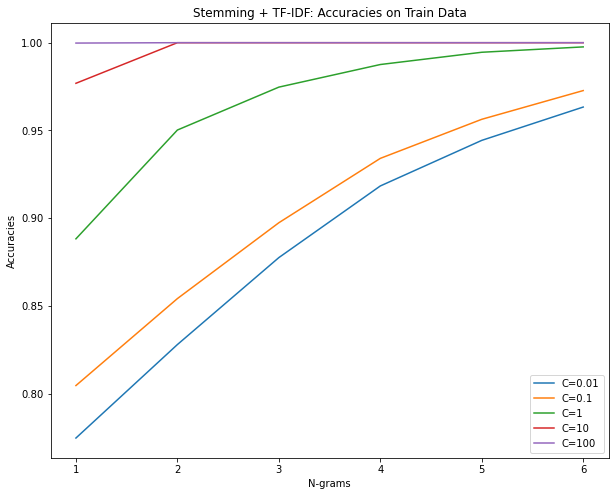

In [46]:
fig=plt.figure(figsize=(10,8))
x=[1,2,3,4,5,6]
plt.plot(x,accuraciest1[0],label="C=0.01")
plt.plot(x,accuraciest1[1],label="C=0.1")
plt.plot(x,accuraciest1[2],label="C=1")
plt.plot(x,accuraciest1[3],label="C=10")
plt.plot(x,accuraciest1[4],label="C=100")
plt.xlabel("N-grams")
plt.ylabel("Accuracies")
plt.title("Stemming + TF-IDF: Accuracies on Train Data")
plt.legend()
plt.show()

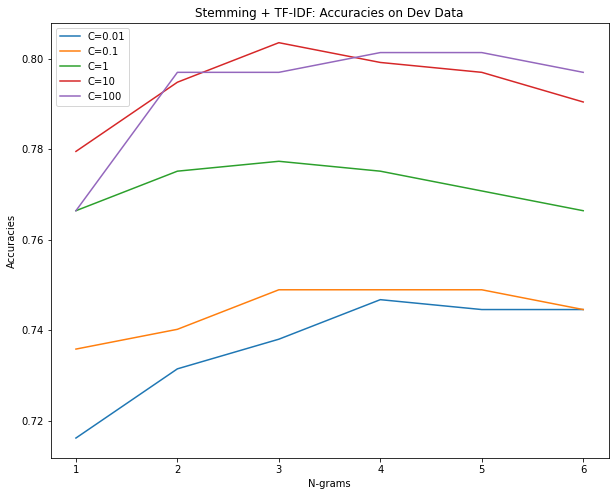

In [47]:
fig=plt.figure(figsize=(10,8))
x=[1,2,3,4,5,6]
plt.plot(x,accuraciesd1[0],label="C=0.01")
plt.plot(x,accuraciesd1[1],label="C=0.1")
plt.plot(x,accuraciesd1[2],label="C=1")
plt.plot(x,accuraciesd1[3],label="C=10")
plt.plot(x,accuraciesd1[4],label="C=100")
plt.xlabel("N-grams")
plt.ylabel("Accuracies")
plt.title("Stemming + TF-IDF: Accuracies on Dev Data")
plt.legend()
plt.show()

# Method 6: TF-IDF on Independent Feature Engineering Method 3 Lammentization

In [48]:
lemmatizer = WordNetLemmatizer()

In [49]:
def lammentization(sentence):
    sentence=sentence.lower()
    arli=[]
    for i in sentence.split(" "):
        arli.append(lemmatizer.lemmatize(i))
    return(arli)

In [50]:
regularizer=[0.01,0.1,1,10,100]
ngram=7
accuraciest1=[]
accuraciesd1=[]
for j in regularizer:
    valuest=[]
    valuesd=[]
    for i in range(1,ngram):
        vectorizer = TfidfVectorizer(tokenizer=lammentization, ngram_range=(1, i))
#         print(f"The value of ngram={i},value of regularizer={j}")
        XTrain = vectorizer.fit_transform(train_data)
        devTrain=vectorizer.transform(dev_data)
        tfidf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=10000,C=j)
        tfidf.fit(XTrain, trainy)
        valuest.append(round(evaluate1(XTrain, trainy, tfidf, 'train'),8))
        valuesd.append(round(evaluate1(devTrain, devy, tfidf, 'dev'),8))
    accuraciest1.append(valuest)
    accuraciesd1.append(valuesd)

In [51]:
accuraciestpd = np.array(accuraciest1)
print("Accuracies on Train")
df = pd.DataFrame(accuraciest1,     index=["C=0.01","C=0.1","C=1","C=10","C=100"],
                 columns=['1-gram', '2-gram','3-gram','4-gram','5-gram','6-gram'])
# for i in range(len(accuraciest)):
#     print("C=",regularizer[i],end="\t\t")
#     for j in range(len(accuraciest[0])):
#         print(j,"-gram",accuraciest[i][j],end=" ")
#     print()
df

Accuracies on Train


,1-gram,2-gram,3-gram,4-gram,5-gram,6-gram
C=0.01,0.778699,0.852466,0.906155,0.945875,0.971410,0.984723
C=0.1,0.807508,0.869926,0.919249,0.954168,0.976430,0.987124
C=1,0.899825,0.955696,0.983850,0.994762,0.997381,0.998691
C=10,0.994544,1.000000,1.000000,1.000000,1.000000,1.000000
C=100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
accuracy_train_data.append(max(df.max()))
df.to_csv(r'result-2-2_TF-IDF+lemmat_train.csv', header=True)

In [53]:
accuraciesdpd = np.array(accuraciesd1)
print("Accuracies on Dev")
df = pd.DataFrame(accuraciesd1,     index=["C=0.01","C=0.1","C=1","C=10","C=100"],
                 columns=['1-gram', '2-gram','3-gram','4-gram','5-gram','6-gram'])
# for i in range(len(accuraciest)):
#     print("C=",regularizer[i],end="\t\t")
#     for j in range(len(accuraciest[0])):
#         print(j,"-gram",accuraciest[i][j],end=" ")
#     print()
df

Accuracies on Dev


,1-gram,2-gram,3-gram,4-gram,5-gram,6-gram
C=0.01,0.716157,0.729258,0.735808,0.735808,0.735808,0.735808
C=0.1,0.722707,0.759825,0.751092,0.751092,0.746725,0.740175
C=1,0.755459,0.775109,0.770742,0.770742,0.772926,0.775109
C=10,0.770742,0.796943,0.781659,0.779476,0.775109,0.772926
C=100,0.770742,0.794760,0.783843,0.790393,0.783843,0.777293


In [54]:
accuracy_dev_data.append(max(df.max()))
df.to_csv(r'result-2-2_TF-IDF+lemmat_dev.csv', header=True)

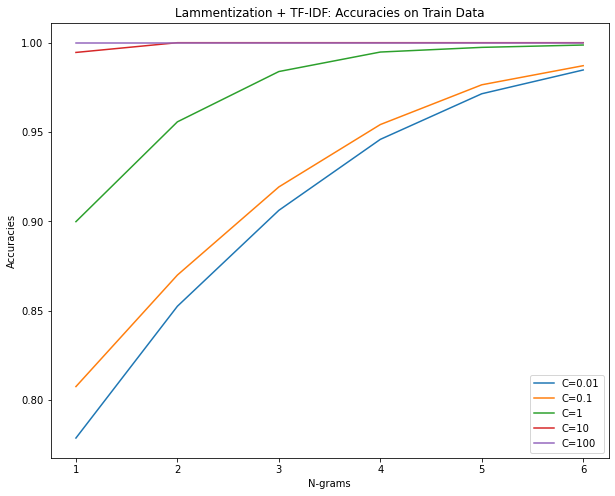

In [55]:
fig=plt.figure(figsize=(10,8))
x=[1,2,3,4,5,6]
plt.plot(x,accuraciest1[0],label="C=0.01")
plt.plot(x,accuraciest1[1],label="C=0.1")
plt.plot(x,accuraciest1[2],label="C=1")
plt.plot(x,accuraciest1[3],label="C=10")
plt.plot(x,accuraciest1[4],label="C=100")
plt.xlabel("N-grams")
plt.ylabel("Accuracies")
plt.title("Lammentization + TF-IDF: Accuracies on Train Data")
plt.legend()
plt.show()

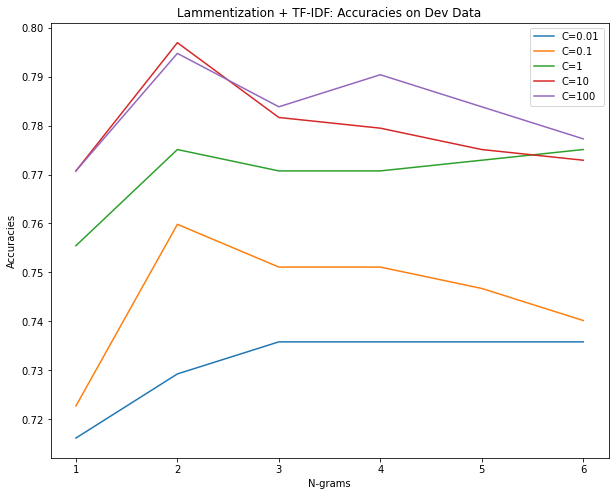

In [56]:
fig=plt.figure(figsize=(10,8))
x=[1,2,3,4,5,6]
plt.plot(x,accuraciesd1[0],label="C=0.01")
plt.plot(x,accuraciesd1[1],label="C=0.1")
plt.plot(x,accuraciesd1[2],label="C=1")
plt.plot(x,accuraciesd1[3],label="C=10")
plt.plot(x,accuraciesd1[4],label="C=100")
plt.xlabel("N-grams")
plt.ylabel("Accuracies")
plt.title("Lammentization + TF-IDF: Accuracies on Dev Data")
plt.legend()
plt.show()

# Comparisions

In [57]:
df = pd.DataFrame(accuracy_train_data,     index=["Base Model","Stop Words Remmoval","Stemming","Lammentization","Stop Words Remmoval + TF-IDF","Stemming + TF-IDF","Lammentization + TF-IDF"],
                 columns=["Accuracies on Train Data"])
df

,Accuracies on Train Data
Base Model,0.982104
Stop Words Remmoval,0.982759
Stemming,0.975120
Lammentization,0.993453
Stop Words Remmoval + TF-IDF,1.000000
Stemming + TF-IDF,1.000000
Lammentization + TF-IDF,1.000000


In [58]:
df.to_csv(r'final_comparision_train.csv', header=True)

In [59]:
df = pd.DataFrame(accuracy_dev_data,        index=["Base Model","Stop Words Remmoval","Stemming","Lammentization","Stop Words Remmoval + TF-IDF","Stemming + TF-IDF","Lammentization + TF-IDF"],
                 columns=["Accuracies on Dev Data"])
df

,Accuracies on Dev Data
Base Model,0.777293
Stop Words Remmoval,0.766376
Stemming,0.770742
Lammentization,0.770742
Stop Words Remmoval + TF-IDF,0.783843
Stemming + TF-IDF,0.803493
Lammentization + TF-IDF,0.796943


In [60]:
df.to_csv(r'final_comparision_dev.csv', header=True)

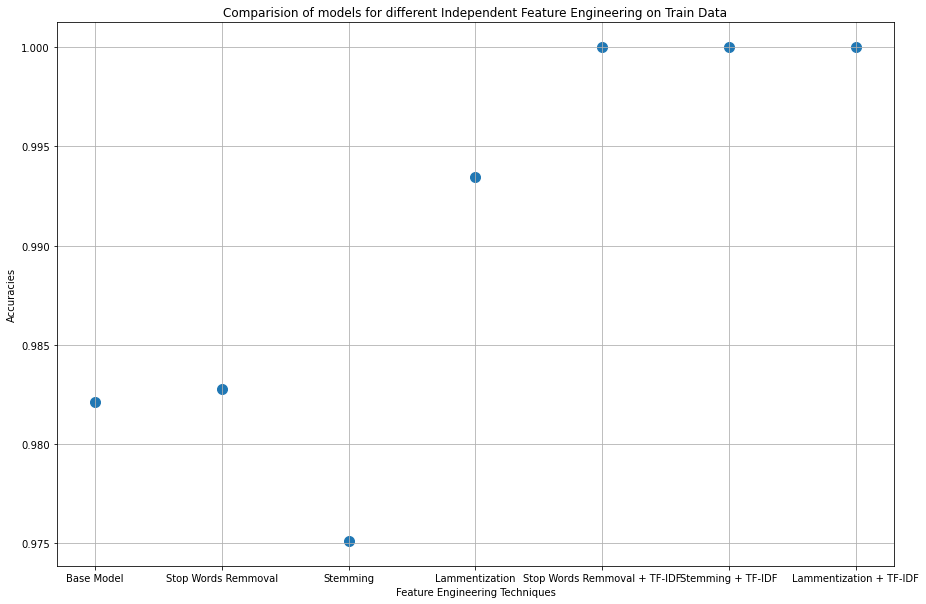

In [61]:
fig=plt.figure(figsize=(15,10))
x=["Base Model","Stop Words Remmoval","Stemming","Lammentization","Stop Words Remmoval + TF-IDF","Stemming + TF-IDF","Lammentization + TF-IDF"]
plt.scatter(x,accuracy_train_data,s=100)
plt.xlabel("Feature Engineering Techniques")
plt.ylabel("Accuracies")
plt.title("Comparision of models for different Independent Feature Engineering on Train Data")
plt.grid()
plt.show()

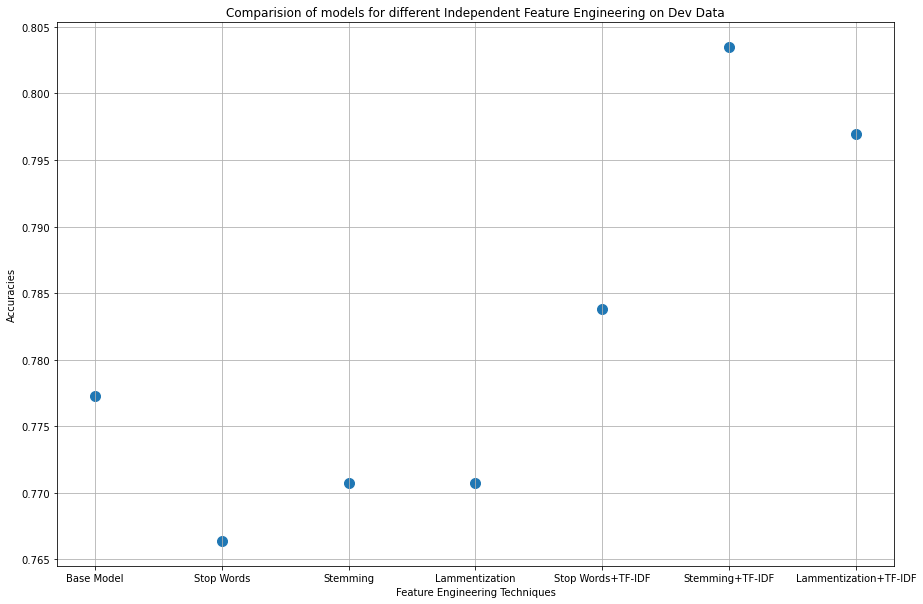

In [62]:
fig=plt.figure(figsize=(15,10))
x=["Base Model","Stop Words","Stemming","Lammentization","Stop Words+TF-IDF","Stemming+TF-IDF","Lammentization+TF-IDF"]
plt.scatter(x,accuracy_dev_data,s=100)
plt.xlabel("Feature Engineering Techniques")
plt.ylabel("Accuracies")
plt.title("Comparision of models for different Independent Feature Engineering on Dev Data")
plt.grid()
plt.show()